# Graphs of functions in python

Plots of some of my used functions.

### Plotting activation functions

In [122]:
import math 
import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-2.5, 2.5, 200)

##### Sigmoid

In [123]:
y_sigmoid = 1/(1 + np.exp(-x))

##### Tanh

In [124]:
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

##### Relu

In [125]:
y_relu = np.maximum(0,x)

##### Linear

In [126]:
y_lin = x

##### Step

In [127]:
y_step = (x >= 0).astype(z.dtype)

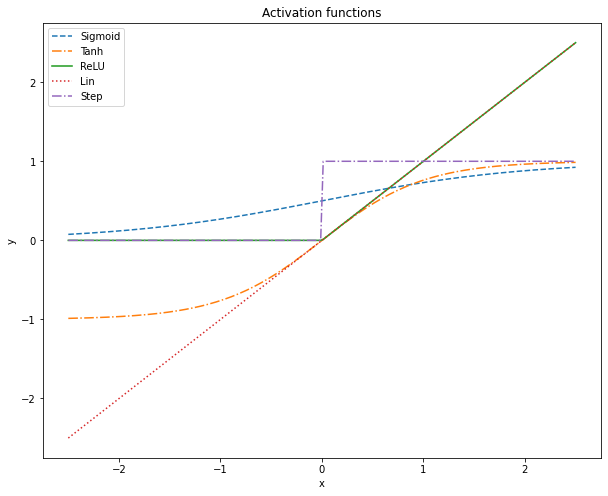

In [158]:
plt.figure(figsize=(10,8))
plt.plot(x, y_sigmoid,"--", label = "Sigmoid")
plt.plot(x, y_tanh,'-.', label = "Tanh")
plt.plot(x, y_relu, label = "ReLU", lw=1.6)
plt.plot(x, y_lin, ':', label = "Lin")
plt.plot(x, y_step, "-.", label = "Step")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Activation functions")
plt.legend()
  
plt.show()